In [8]:
BOOKS_PATH = r'..\data\raw\books.csv'
RATING_PATH = r'..\data\raw\ratings.csv'
USERS_PATH = r'..\data\raw\users.csv'

PROCESSED_BOOKS_OUTPUT = r'..\data\processed\cleaned_books.csv'
PROCESSED_Rating_OUTPUT = r'..\data\processed\cleaned_Rating.csv'
PROCESSED_Users_OUTPUT = r'..\data\processed\cleaned_users.csv'

Importing

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
books_df = pd.read_csv(BOOKS_PATH, sep=';',encoding='latin1', on_bad_lines='skip')
rating_df = pd.read_csv(RATING_PATH, sep=';',encoding='latin1', on_bad_lines='skip')
users_df = pd.read_csv(USERS_PATH, sep=';',encoding='latin1', on_bad_lines='skip')

C:\Users\gattu\AppData\Local\Temp\ipykernel_18012\4087042005.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(BOOKS_PATH, sep=';',encoding='latin1', on_bad_lines='skip')


In [13]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


1) Missing Values

In [17]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
books_df.dropna(inplace=True)

2)Selecting the Features

In [22]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [24]:
books_df.drop(['Image-URL-S', 'Image-URL-M'], axis=1, inplace=True)

In [26]:
books_df = books_df.rename(columns={
    'ISBN': 'ISBN',
    'Book-Title': 'Title',
    'Book-Author': 'Author',
    'Year-Of-Publication': 'Publication_year',
    'Publisher': 'Publisher',
    'Image-URL-L': 'Book_image'
})

2) Coorect data types

In [29]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271353 non-null  object
 1   Title             271353 non-null  object
 2   Author            271353 non-null  object
 3   Publication_year  271353 non-null  object
 4   Publisher         271353 non-null  object
 5   Book_image        271353 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


In [31]:
books_df['Publication_year'] = pd.to_numeric(books_df['Publication_year'])

In [33]:
books_df['Publication_year'].describe()

count    271353.000000
mean       1959.760235
std         257.996082
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Publication_year, dtype: float64

In [35]:
books_df[books_df['Publication_year'] > 2004]

,ISBN,Title,Author,Publication_year,Publisher,Book_image
3541,0140124373,Red Dwarf,Grant Naylor,2005,Penguin Books Ltd,http://images.amazon.com/images/P/0140124373.0...
12782,0380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...
26166,006272004X,The Astrologer's Handbook,Frances Sakoian,2005,HarperResource,http://images.amazon.com/images/P/006272004X.0...
30010,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068160204X.0...
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...
...,...,...,...,...,...,...
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...
258207,0743484894,The Winter's Tale (Folger Shakespeare Library),William Shakespeare,2005,Washington Square Press,http://images.amazon.com/images/P/0743484894.0...
260974,0671740989,FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS,Bill Gutman,2030,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0671740989.0...
269371,1582344574,"Ninth Life of Louis Drax, The -POSTPONED",Liz Jensen,2005,Bloomsbury USA,http://images.amazon.com/images/P/1582344574.0...


In [37]:
books_df = books_df[~(books_df['Publication_year'] > 2024)]

3) check for dupllication

In [40]:
books_df.head()

,ISBN,Title,Author,Publication_year,Publisher,Book_image
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [42]:
len(books_df['ISBN'].unique())

271341

In [44]:
books_df['Title']

0                                       Classical Mythology
1                                              Clara Callan
2                                      Decision in Normandy
3         Flu: The Story of the Great Influenza Pandemic...
4                                    The Mummies of Urumchi
                                ...                        
271355                           There's a Bat in Bunk Five
271356                              From One to One Hundred
271357    Lily Dale : The True Story of the Town that Ta...
271358                          Republic (World's Classics)
271359    A Guided Tour of Rene Descartes' Meditations o...
Name: Title, Length: 271341, dtype: object

In [46]:
books_df = books_df[~(books_df.duplicated(['Title']))]

4) Outliers

C:\Users\gattu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Publication_year', ylabel='Count'>

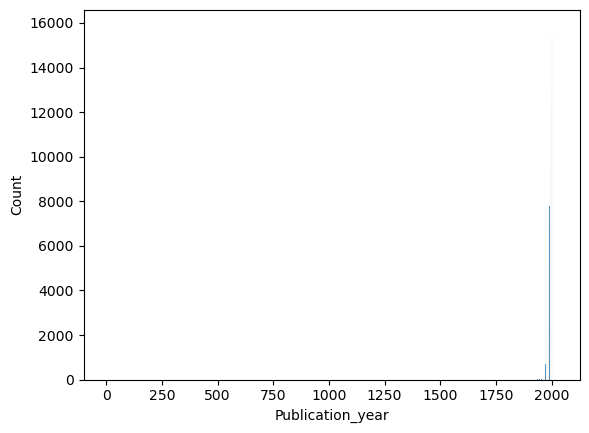

In [49]:
sns.histplot(books_df['Publication_year'])

In [50]:
books_df = books_df[~(books_df['Publication_year'] == 0)]

C:\Users\gattu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Publication_year', ylabel='Count'>

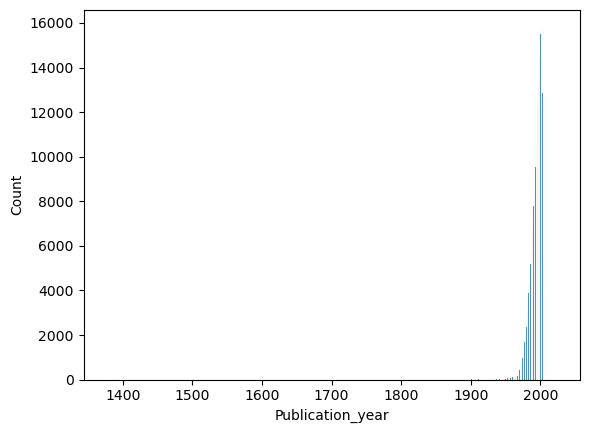

In [51]:
sns.histplot(books_df['Publication_year'])

In [54]:
books_df = books_df[~(books_df['Publication_year'] < 1900)]

In [55]:
len(books_df['ISBN'].unique())

238199

In [56]:
books_df.head()

,ISBN,Title,Author,Publication_year,Publisher,Book_image
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


C:\Users\gattu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Publication_year', ylabel='Count'>

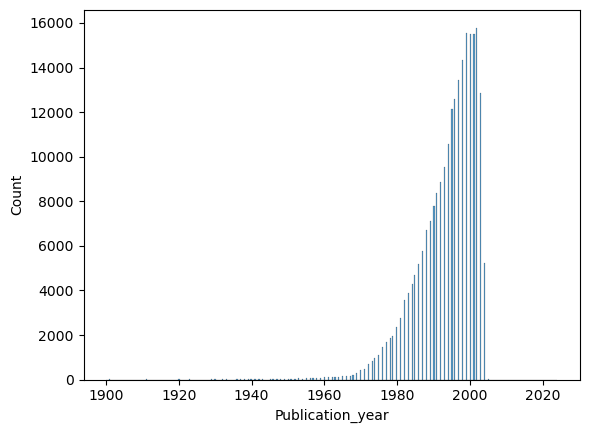

In [57]:
sns.histplot(books_df['Publication_year'])

In [67]:
books_df = books_df[~(books_df['Publication_year'] < 1960)]

C:\Users\gattu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Publication_year', ylabel='Count'>

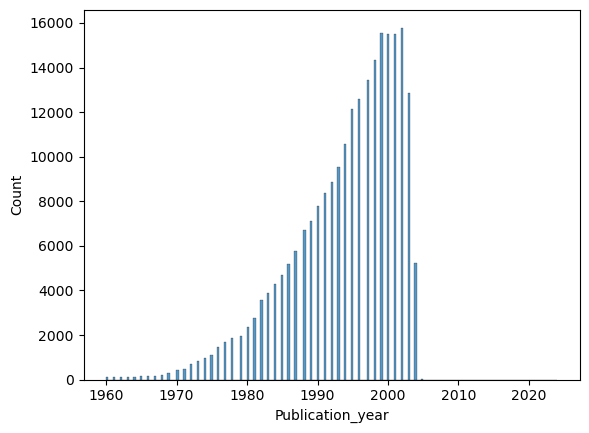

In [69]:
sns.histplot(books_df['Publication_year'])

In [73]:
books_df.to_csv(PROCESSED_BOOKS_OUTPUT, index=False)

2) Users

In [76]:
users_df


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


a) Missing Values

In [79]:
users_df.isna().sum() / len(users_df) * 100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [81]:
users_df.drop('Age', axis=1, inplace=True)

2) select features

b) coorect data types

In [85]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


3) Check for duplication

In [88]:
users_df.isna().sum() / len(users_df) * 100

User-ID     0.0
Location    0.0
dtype: float64

In [90]:
# users_df.drop('Age', axis=1, inplace=True)


2) select features 
    2) correct data types

In [93]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


3) check for duplication

In [96]:
users_df[users_df.duplicated()]

,User-ID,Location


In [98]:
users_df.to_csv(PROCESSED_Users_OUTPUT, index=False)

Ratings

In [101]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [103]:
# Missing values
rating_df.isna().sum() / len(rating_df) * 100

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

2) select features
    2) correct data types

In [106]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


3. check for duplication

In [109]:
rating_df[rating_df.duplicated()]

,User-ID,ISBN,Book-Rating


4 ) Outliers

C:\Users\gattu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Book-Rating', ylabel='Count'>

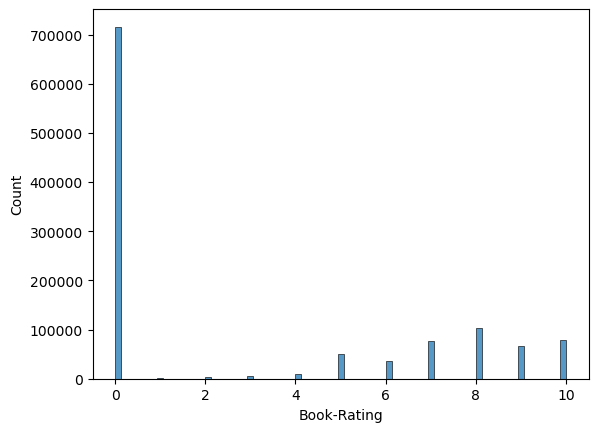

In [112]:
sns.histplot(rating_df['Book-Rating'])

In [114]:
rating_df['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [116]:
rating_df['User-ID'].value_counts().head(1000)

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
80810       183
196738      183
54828       182
33580       182
80555       182
Name: count, Length: 1000, dtype: int64

In [118]:
rating_df['ISBN'].value_counts().head(50)

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
0440226430     482
0312278586     474
0743418174     470
0671021001     468
0345370775     466
0446605239     465
0156027321     462
0440241073     456
0671003755     446
0060976845     434
1400034779     431
0786868716     427
0440234743     422
0440222656     420
0440221471     419
0345361792     412
0440236673     408
0345417623     407
0316769487     403
0385484518     391
0446610038     391
0446310786     389
044022165X     386
0375706771     380
0440220602     379
0440225701     379
0060502258     376
0446606812     369
0345353145     368
Name: count, dtype: int64

In [120]:
rating_df.to_csv(PROCESSED_Rating_OUTPUT, index=False)